In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_lappy=pd.read_csv('Data_laptop.csv',encoding='latin-1')
df_lappy.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df_lappy.shape

(1303, 13)

In [4]:
df_lappy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


##### Most of fetaure data is object type and no missing data there. 

In [5]:
df_lappy.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


#### Data Preprocessing 

In [6]:
df_lappy.drop(columns=['laptop_ID'],inplace=True)

In [7]:
cols_categoricalData=['Company','Product','TypeName','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys']
for feature in cols_categoricalData:
    print('Unique value of ',feature,' - ',len(df_lappy[feature].unique()))
    print(df_lappy[feature].unique())

Unique value of  Company  -  19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Unique value of  Product  -  618
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7R

In [8]:
df_lappy.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
df_lappy.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

##### All weight value is format like weight value, then kg 

In [10]:
k=df_lappy.Weight.astype('str')
print(k.dtype)

# Removing 'kg' from Weight fetaure value  
df_lappy.Weight=df_lappy.Weight.apply(lambda x : float(str(x).replace('kg','')))
df_lappy.rename(columns={'Weight':'Weight_kg'},inplace=True)
df_lappy.Weight_kg.head()

object


0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight_kg, dtype: float64

In [11]:
# Removing attached string 'GB' from Ram feature value 

df_lappy.Ram=df_lappy.Ram.apply(lambda x : int(float(str(x).replace('GB',''))))
df_lappy.rename(columns={'Ram':'Ram_GB'},inplace=True)
df_lappy.Ram_GB.head()

0     8
1     8
2     8
3    16
4     8
Name: Ram_GB, dtype: int64

In [12]:
df_lappy.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [13]:
df_lappy.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [14]:
df_lappy.Memory.head(30)

0                  128GB SSD
1        128GB Flash Storage
2                  256GB SSD
3                  512GB SSD
4                  256GB SSD
5                  500GB HDD
6        256GB Flash Storage
7        256GB Flash Storage
8                  512GB SSD
9                  256GB SSD
10                 500GB HDD
11                 500GB HDD
12                 256GB SSD
13                 256GB SSD
14                 256GB SSD
15                 256GB SSD
16                 256GB SSD
17                 512GB SSD
18                   1TB HDD
19                 128GB SSD
20        32GB Flash Storage
21      128GB SSD +  1TB HDD
22                 500GB HDD
23                 256GB SSD
24                 256GB SSD
25                   1TB HDD
26       128GB Flash Storage
27                 256GB SSD
28    256GB SSD +  256GB SSD
29                   1TB HDD
Name: Memory, dtype: object

In [15]:
df_lappy['Memory'] = df_lappy['Memory'].str.replace('Flash Storage','FlashStorage')
df_lappy['Memory1']=pd.Series([]).astype('str')
df_lappy['Memory2']=pd.Series([]).astype('str')

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_21012/3937309570.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lappy['Memory1']=pd.Series([]).astype('str')
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_21012/3937309570.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lappy['Memory2']=pd.Series([]).astype('str')


In [16]:
# Separating Memory as two parts, as for some records,2 Memory data present with + symbol

for i,x in enumerate(df_lappy['Memory']):
    if '+' in x:
        m1,m2= x.split(' +  ')
        df_lappy.loc[i,'Memory1']=m1
        df_lappy.loc[i,'Memory2']=m2
    else:
        df_lappy.loc[i,'Memory1']=x
        df_lappy.loc[i,'Memory2']=0

In [17]:
# Having separate column for size and type for 2 memories 
df_lappy['Memory1_size']=pd.Series([]).astype('str')
df_lappy['Memory1_type']=pd.Series([]).astype('str')
df_lappy['Memory2_size']=pd.Series([]).astype('str')
df_lappy['Memory2_type']=pd.Series([]).astype('str')

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_21012/1012056076.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lappy['Memory1_size']=pd.Series([]).astype('str')
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_21012/1012056076.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lappy['Memory1_type']=pd.Series([]).astype('str')
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_21012/1012056076.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lappy['Memory2_size']=pd.Series([]).astype('str')
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_21012/1012056076.py:5: DeprecationWarning: The default dtype for empty Series wi

In [18]:
# Getting value of memory type and size 

for i,x in enumerate(df_lappy['Memory1']):
    m1s,m1t= x.split(' ')
    df_lappy.loc[i,'Memory1_size']=m1s
    df_lappy.loc[i,'Memory1_type']=m1t
        
for i,x in enumerate(df_lappy['Memory2']):
    if x!=0:
        m2s,m2t= x.split(' ')
        df_lappy.loc[i,'Memory2_size']=m2s
        df_lappy.loc[i,'Memory2_type']=m2t  
    else:
        df_lappy.loc[i,'Memory2_size']=0
        df_lappy.loc[i,'Memory2_type']='NotPresent'

In [19]:
df_lappy.Memory1_size.value_counts()

256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: Memory1_size, dtype: int64

In [20]:
# Changing memory size TB to GB scale by multiplying 1000

df_lappy.Memory1_size=df_lappy.Memory1_size.apply(lambda m1s: int(float(m1s[:-2]))*1000 if 'TB' in m1s else int(float(m1s[:-2])))
df_lappy.Memory2_size=df_lappy.Memory2_size.apply(lambda m2s: int(0) if m2s==0 else (int(float(m2s[:-2]))*1000 if 'TB' in m2s else int(float(m2s[:-2]))))

df_lappy.rename(columns={'Memory1_size':'Memory1_size_GB','Memory2_size':'Memory2_size_GB'},inplace=True)

In [21]:
df_lappy.Memory1_size_GB.unique()

array([ 128,  256,  512,  500, 1000,   32,   64, 2000,   16,  180,  240,
          8,  508], dtype=int64)

In [22]:
# Getting value of CPU manufacturing company name, CPU type , CPU type details(Cpu_Type_intensity),frequency of CPU(Cpu_Ghz) from columns CPU data

df_lappy['Cpu_Company'] = df_lappy['Cpu'].apply(lambda cpu: cpu.split(' ')[0])
df_lappy['Cpu_Type'] = df_lappy['Cpu'].apply(lambda cpu: cpu.split(' ')[1])
df_lappy['Cpu_Type_intensity'] = df_lappy['Cpu'].apply(lambda cpu: cpu.split(' ')[2])
df_lappy['Cpu_Ghz'] = df_lappy['Cpu'].apply(lambda cpu: np.float(cpu.split(' ')[-1][:-3]))

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_21012/2841164295.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lappy['Cpu_Ghz'] = df_lappy['Cpu'].apply(lambda cpu: np.float(cpu.split(' ')[-1][:-3]))


In [23]:
df_lappy['Cpu_Type'].unique()

array(['Core', 'A9-Series', 'Atom', 'E-Series', 'A6-Series', 'Celeron',
       'Ryzen', 'Pentium', 'FX', 'Xeon', 'A10-Series', 'A8-Series',
       'A12-Series', 'A4-Series', 'Cortex'], dtype=object)

In [24]:
# Getting value of GPU manufacturing company name, GPU type from columns GPU data

df_lappy['Gpu_company'] = df_lappy['Gpu'].apply(lambda x: x.split(' ')[0])
df_lappy['Gpu_type'] = df_lappy['Gpu'].apply(lambda x: x.split(' ')[1])

In [25]:
df_lappy.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [26]:
df_lappy.ScreenResolution.apply(lambda x: x.split(' ')[0]).unique()

array(['IPS', '1440x900', 'Full', '1366x768', 'Touchscreen', 'Quad', '4K',
       '1600x900', '2560x1440', '1920x1080'], dtype=object)

In [27]:
df_lappy.ScreenResolution.apply(lambda x: x.split(' ')[0]).value_counts()

Full           554
IPS            365
1366x768       281
Touchscreen     35
1600x900        23
Quad            18
4K              17
1440x900         4
2560x1440        3
1920x1080        3
Name: ScreenResolution, dtype: int64

In [28]:
# Getting value of screen type and screen resolution pixel horizontal and vertical from columns ScreenResolution data


for i,x in enumerate(df_lappy['ScreenResolution']):
    screenType = x.split(' ')[0]
    if screenType in ['IPS','Full','Touchscreen','Quad','4K']:
        df_lappy.loc[i,'ScreenType'] = screenType         
    elif screenType=='1366x768':
        df_lappy.loc[i,'ScreenType'] = 'Other1'
    else:
        df_lappy.loc[i,'ScreenType'] = 'Other2'
    
    SRPxlH,SRPxlV = x.split(' ')[-1].split('x')[0],x.split(' ')[-1].split('x')[1]
    df_lappy.loc[i,'SRPxlH'] = SRPxlH
    df_lappy.loc[i,'SRPxlV'] = SRPxlV
    
df_lappy['SRPxlH']=df_lappy['SRPxlH'].astype('int')
df_lappy['SRPxlV']=df_lappy['SRPxlV'].astype('int')

In [29]:
pd.set_option('max_columns',None )
df_lappy.head(21)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,Memory1,Memory2,Memory1_size_GB,Memory1_type,Memory2_size_GB,Memory2_type,Cpu_Company,Cpu_Type,Cpu_Type_intensity,Cpu_Ghz,Gpu_company,Gpu_type,ScreenType,SRPxlH,SRPxlV
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128GB SSD,0,128,SSD,0,NotPresent,Intel,Core,i5,2.30,Intel,Iris,IPS,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB FlashStorage,Intel HD Graphics 6000,macOS,1.34,898.94,128GB FlashStorage,0,128,FlashStorage,0,NotPresent,Intel,Core,i5,1.80,Intel,HD,Other2,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256GB SSD,0,256,SSD,0,NotPresent,Intel,Core,i5,2.50,Intel,HD,Full,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512GB SSD,0,512,SSD,0,NotPresent,Intel,Core,i7,2.70,AMD,Radeon,IPS,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256GB SSD,0,256,SSD,0,NotPresent,Intel,Core,i5,3.10,Intel,Iris,IPS,2560,1600
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,500GB HDD,0,500,HDD,0,NotPresent,AMD,A9-Series,9420,3.00,AMD,Radeon,Other1,1366,768
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB FlashStorage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,256GB FlashStorage,0,256,FlashStorage,0,NotPresent,Intel,Core,i7,2.20,Intel,Iris,IPS,2880,1800
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB FlashStorage,Intel HD Graphics 6000,macOS,1.34,1158.70,256GB FlashStorage,0,256,FlashStorage,0,NotPresent,Intel,Core,i5,1.80,Intel,HD,Other2,1440,900
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00,512GB SSD,0,512,SSD,0,NotPresent,Intel,Core,i7,1.80,Nvidia,GeForce,Full,1920,1080
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00,256GB SSD,0,256,SSD,0,NotPresent,Intel,Core,i5,1.60,Intel,UHD,IPS,1920,1080


In [30]:
pd.set_option('max_rows',None)
df_lappy.Product.value_counts()[:]

XPS 13                                           30
Inspiron 3567                                    29
250 G6                                           21
Legion Y520-15IKBN                               19
Vostro 3568                                      19
Inspiron 5570                                    18
ProBook 450                                      18
Alienware 17                                     15
Inspiron 5567                                    14
Satellite Pro                                    13
EliteBook 840                                    12
Latitude 5580                                    12
ThinkPad X1                                      12
Aspire 3                                         12
Inspiron 7567                                    10
EliteBook 850                                    10
MacBook Pro                                      10
EliteBook 820                                     9
Inspiron 3552                                     9
XPS 15      

In [31]:
df_lappy.drop(columns=['Product','ScreenResolution','Cpu','Memory','Gpu','Memory1','Memory2'],inplace=True)
df_lappy.head(2)

,Company,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Memory1_size_GB,Memory1_type,Memory2_size_GB,Memory2_type,Cpu_Company,Cpu_Type,Cpu_Type_intensity,Cpu_Ghz,Gpu_company,Gpu_type,ScreenType,SRPxlH,SRPxlV
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,128,SSD,0,NotPresent,Intel,Core,i5,2.3,Intel,Iris,IPS,2560,1600
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,128,FlashStorage,0,NotPresent,Intel,Core,i5,1.8,Intel,HD,Other2,1440,900


In [32]:
df_lappy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Ram_GB              1303 non-null   int64  
 4   OpSys               1303 non-null   object 
 5   Weight_kg           1303 non-null   float64
 6   Price_euros         1303 non-null   float64
 7   Memory1_size_GB     1303 non-null   int64  
 8   Memory1_type        1303 non-null   object 
 9   Memory2_size_GB     1303 non-null   int64  
 10  Memory2_type        1303 non-null   object 
 11  Cpu_Company         1303 non-null   object 
 12  Cpu_Type            1303 non-null   object 
 13  Cpu_Type_intensity  1303 non-null   object 
 14  Cpu_Ghz             1303 non-null   float64
 15  Gpu_company         1303 non-null   object 
 16  Gpu_ty

In [33]:
cols_categoricalDataNow=['Company','TypeName','OpSys','Memory1_type','Memory2_type','Cpu_Company','Cpu_Type','Cpu_Type_intensity','Gpu_company','Gpu_type','ScreenType']
for feature in cols_categoricalDataNow:
    print('Unique value of ',feature,' - ',len(df_lappy[feature].unique()))
    print(df_lappy[feature].unique())

Unique value of  Company  -  19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Unique value of  TypeName  -  6
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Unique value of  OpSys  -  9
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Unique value of  Memory1_type  -  4
['SSD' 'FlashStorage' 'HDD' 'Hybrid']
Unique value of  Memory2_type  -  4
['NotPresent' 'HDD' 'SSD' 'Hybrid']
Unique value of  Cpu_Company  -  3
['Intel' 'AMD' 'Samsung']
Unique value of  Cpu_Type  -  15
['Core' 'A9-Series' 'Atom' 'E-Series' 'A6-Series' 'Celeron' 'Ryzen'
 'Pentium' 'FX' 'Xeon' 'A10-Series' 'A8-Series' 'A12-Series' 'A4-Series'
 'Cortex']
Unique value of  Cpu_Type_intensity  -  38
['i5' 'i7' '9420' 'i3' 'M' 'x5-Z8350' 'E2-9000e' 'x5-Z8300' 'E2-6110'
 '9220' 'Dual' '1700' 'Quad' 'x5-Z8550' '9830P' '6110' 'E3-15

In [34]:
df_lappy.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [35]:
# Getting names of Company having count less than equal to 7 and rename them as 'Company_other'

valCount_company_lap=df_lappy.Company.value_counts(ascending=True)
valCountle7_company_lap=np.array(valCount_company_lap[valCount_company_lap<=7].index)
print(valCountle7_company_lap)

df_lappy.Company=df_lappy.Company.apply(lambda x: 'Company_other' if x in valCountle7_company_lap else x)
df_lappy.Company.unique()

['Huawei' 'LG' 'Google' 'Chuwi' 'Fujitsu' 'Vero' 'Xiaomi' 'Microsoft'
 'Mediacom' 'Razer']


array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Company_other',
       'MSI', 'Toshiba', 'Samsung'], dtype=object)

In [36]:
df_lappy.Gpu_type.value_counts()

HD            639
GeForce       368
Radeon        173
UHD            68
Quadro         31
Iris           14
FirePro         5
R4              1
GTX             1
R17M-M1-70      1
Graphics        1
Mali            1
Name: Gpu_type, dtype: int64

In [37]:
# Getting names of GPU Type having count equal to 1 and rename them as 'Gpu_type_other'

valCount_Gpu_type_lap=df_lappy.Gpu_type.value_counts(ascending=True)
valCounte1_Gpu_type_lap=np.array(valCount_Gpu_type_lap[valCount_Gpu_type_lap==1].index)
print(valCounte1_Gpu_type_lap)

df_lappy.Gpu_type=df_lappy.Gpu_type.apply(lambda x: 'Gpu_type_other' if x in valCounte1_Gpu_type_lap else x)
df_lappy.Gpu_type.unique()

['R4' 'GTX' 'R17M-M1-70' 'Graphics' 'Mali']


array(['Iris', 'HD', 'Radeon', 'GeForce', 'UHD', 'Gpu_type_other',
       'Quadro', 'FirePro'], dtype=object)

In [38]:
df_lappy.Cpu_Type.value_counts()

Core          1105
Celeron         88
Pentium         30
A9-Series       17
Atom            13
A6-Series       11
E-Series         9
A12-Series       8
A10-Series       6
Ryzen            4
Xeon             4
A8-Series        4
FX               2
A4-Series        1
Cortex           1
Name: Cpu_Type, dtype: int64

In [39]:
df_lappy.Cpu_Type_intensity.value_counts()

i7           527
i5           423
i3           136
Dual          83
Quad          35
M             19
9420          12
9220           8
9720P          7
x5-Z8350       5
7410           4
x5-Z8550       4
9410           3
1700           3
9600P          2
X5-Z8350       2
E3-1535M       2
A9-9420        2
9620P          2
E2-9000e       2
7110           2
A6-9220        2
A10-9620P      2
E3-1505M       2
9700P          1
9000           1
A72&A53        1
6110           1
8800P          1
7210           1
x5-Z8300       1
Z8350          1
E2-6110        1
E2-9000        1
9000e          1
9830P          1
1600           1
7310           1
Name: Cpu_Type_intensity, dtype: int64

In [40]:
# Getting names of Cpu Type intensity having count less tha 10 and rename them as 'Cpu_Type_intensity_other'

valCount_Cpu_Type_intsty_lap=df_lappy.Cpu_Type_intensity.value_counts(ascending=True)
valCountl10_Cpu_Type_intsty_lap=np.array(valCount_Cpu_Type_intsty_lap[valCount_Cpu_Type_intsty_lap<10].index)
print(valCountl10_Cpu_Type_intsty_lap)

df_lappy.Cpu_Type_intensity=df_lappy.Cpu_Type_intensity.apply(lambda x: 'Cpu_Type_intensity_other' if x in valCountl10_Cpu_Type_intsty_lap else x)
df_lappy.Cpu_Type_intensity.unique()

['E2-9000' '9000' '9000e' '6110' '9830P' '7310' 'Z8350' 'E2-6110' '1600'
 '9700P' '7210' '8800P' 'A72&A53' 'x5-Z8300' 'E2-9000e' '9620P' 'E3-1535M'
 'A9-9420' 'E3-1505M' 'X5-Z8350' 'A6-9220' '9600P' '7110' 'A10-9620P'
 '9410' '1700' '7410' 'x5-Z8550' 'x5-Z8350' '9720P' '9220']


array(['i5', 'i7', '9420', 'i3', 'M', 'Cpu_Type_intensity_other', 'Dual',
       'Quad'], dtype=object)

In [41]:
df_lappy.columns

Index(['Company', 'TypeName', 'Inches', 'Ram_GB', 'OpSys', 'Weight_kg',
       'Price_euros', 'Memory1_size_GB', 'Memory1_type', 'Memory2_size_GB',
       'Memory2_type', 'Cpu_Company', 'Cpu_Type', 'Cpu_Type_intensity',
       'Cpu_Ghz', 'Gpu_company', 'Gpu_type', 'ScreenType', 'SRPxlH', 'SRPxlV'],
      dtype='object')

In [42]:
df_lappy.head(2)

,Company,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Memory1_size_GB,Memory1_type,Memory2_size_GB,Memory2_type,Cpu_Company,Cpu_Type,Cpu_Type_intensity,Cpu_Ghz,Gpu_company,Gpu_type,ScreenType,SRPxlH,SRPxlV
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,128,SSD,0,NotPresent,Intel,Core,i5,2.3,Intel,Iris,IPS,2560,1600
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,128,FlashStorage,0,NotPresent,Intel,Core,i5,1.8,Intel,HD,Other2,1440,900


<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

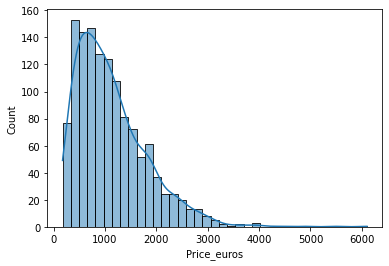

In [43]:
sns.histplot(df_lappy.Price_euros,kde=True)

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

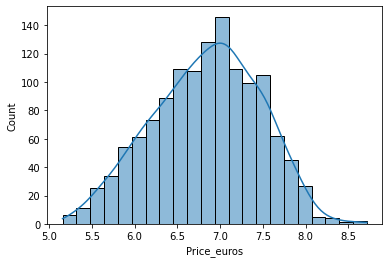

In [44]:
sns.histplot(np.log(df_lappy.Price_euros),kde=True)

[]

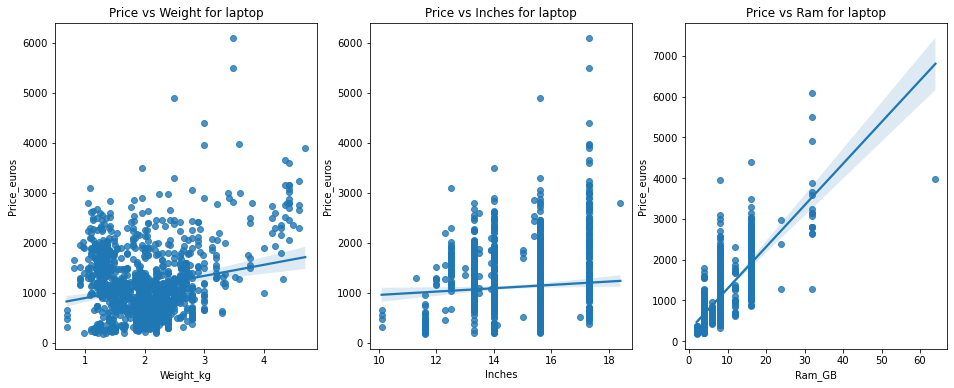

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.regplot(x=df_lappy.Weight_kg,y=df_lappy.Price_euros)
plt.title("Price vs Weight for laptop")

plt.subplot(1,3,2)
sns.regplot(x=df_lappy.Inches,y=df_lappy.Price_euros)
plt.title("Price vs Inches for laptop")

plt.subplot(1,3,3)
sns.regplot(x=df_lappy.Ram_GB,y=df_lappy.Price_euros)
plt.title("Price vs Ram for laptop")
plt.plot()

[]

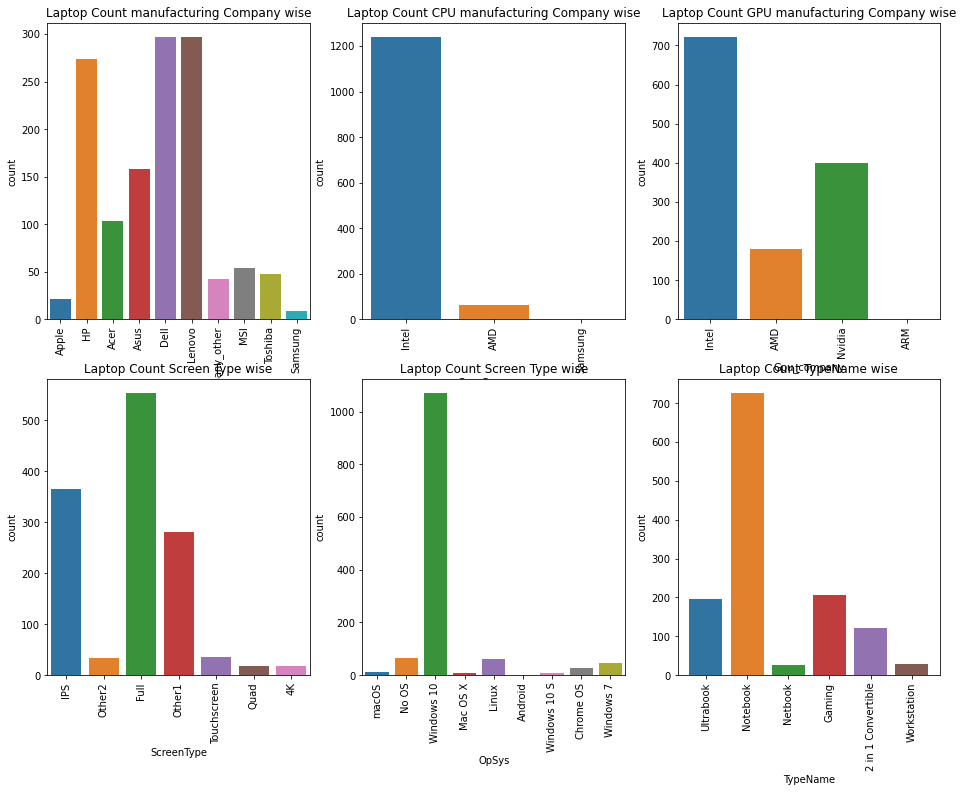

In [46]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
sns.countplot(x=df_lappy.Company)
plt.title('Laptop Count manufacturing Company wise')
plt.xticks(rotation=90)

plt.subplot(2,3,2)
sns.countplot(x=df_lappy.Cpu_Company)
plt.title('Laptop Count CPU manufacturing Company wise')
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x=df_lappy.Gpu_company)
plt.title('Laptop Count GPU manufacturing Company wise')
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x=df_lappy.ScreenType)
plt.title('Laptop Count Screen Type wise')
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x=df_lappy.OpSys)
plt.title('Laptop Count Screen Type wise')
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x=df_lappy.TypeName)
plt.title('Laptop Count TypeName wise')
plt.xticks(rotation=90)

plt.plot()


[]

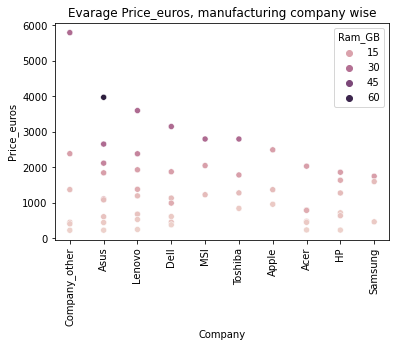

In [47]:
grpby_Company=df_lappy.groupby(['Company','Ram_GB']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
sns.scatterplot(x ='Company',y ='Price_euros',data=grpby_Company,hue='Ram_GB')
plt.title('Evarage Price_euros, manufacturing company wise')
plt.xticks(rotation=90)
plt.plot()

In [48]:
# Separating dependent(target) and independent(input) data 
X=df_lappy.drop(columns=['Price_euros'])
Y=df_lappy.Price_euros

print(X.shape,Y.shape)

(1303, 19) (1303,)


In [49]:
X.head(2)

,Company,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Memory1_size_GB,Memory1_type,Memory2_size_GB,Memory2_type,Cpu_Company,Cpu_Type,Cpu_Type_intensity,Cpu_Ghz,Gpu_company,Gpu_type,ScreenType,SRPxlH,SRPxlV
0,Apple,Ultrabook,13.3,8,macOS,1.37,128,SSD,0,NotPresent,Intel,Core,i5,2.3,Intel,Iris,IPS,2560,1600
1,Apple,Ultrabook,13.3,8,macOS,1.34,128,FlashStorage,0,NotPresent,Intel,Core,i5,1.8,Intel,HD,Other2,1440,900


In [50]:
cols_categoricalDataNow

['Company',
 'TypeName',
 'OpSys',
 'Memory1_type',
 'Memory2_type',
 'Cpu_Company',
 'Cpu_Type',
 'Cpu_Type_intensity',
 'Gpu_company',
 'Gpu_type',
 'ScreenType']

#### Encoding 

In [51]:
# lable encoding each categorical feature and keeping encoder object in dictionary 
from sklearn.preprocessing import LabelEncoder 
dict_LEs={}
for cols in cols_categoricalDataNow:
    dict_LEs[cols]=LabelEncoder()
    X[cols]= dict_LEs[cols].fit_transform(X[cols])
    
X.head()

,Company,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Memory1_size_GB,Memory1_type,Memory2_size_GB,Memory2_type,Cpu_Company,Cpu_Type,Cpu_Type_intensity,Cpu_Ghz,Gpu_company,Gpu_type,ScreenType,SRPxlH,SRPxlV
0,1,4,13.3,8,8,1.37,128,3,0,2,1,8,6,2.3,2,4,2,2560,1600
1,1,4,13.3,8,8,1.34,128,0,0,2,1,8,6,1.8,2,3,4,1440,900
2,5,3,15.6,8,4,1.86,256,3,0,2,1,8,6,2.5,2,3,1,1920,1080
3,1,4,15.4,16,8,1.83,512,3,0,2,1,8,7,2.7,0,6,2,2880,1800
4,1,4,13.3,8,8,1.37,256,3,0,2,1,8,6,3.1,2,4,2,2560,1600


[]

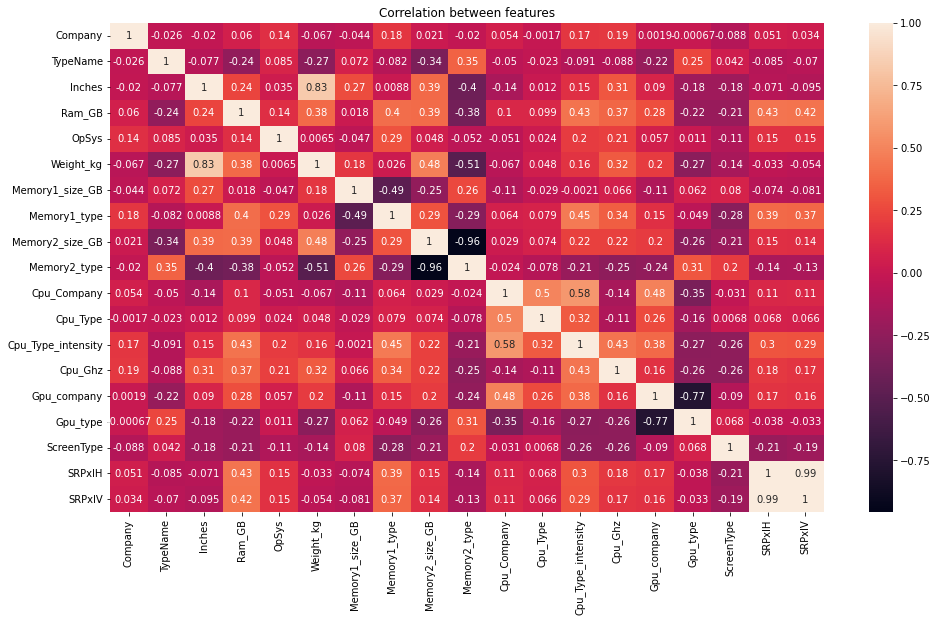

In [52]:
plt.figure(figsize=(16,9))
sns.heatmap(X.corr(),annot=True)
plt.title('Correlation between features')
plt.plot()

##### Weight and Inches are highly correlated (0.83)

In [54]:
# Train and test data splitting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1042, 19) (1042,)
(261, 19) (261,)


#### Standard Scaling 

In [55]:
# Standard scaling each feature and keeping scaler object in dictionary
x_train_scaled=x_train.copy()
x_test_scaled=x_test.copy()

from sklearn.preprocessing import StandardScaler 
dict_Scalers={}
for cols in X.columns:
    dict_Scalers[cols]=StandardScaler()
    x_train_scaled[cols]=dict_Scalers[cols].fit_transform(x_train[cols].values.reshape(-1,1))
    x_test_scaled[cols]=dict_Scalers[cols].transform(x_test[cols].values.reshape(-1,1))
    
    
x_train_scaled.head()

,Company,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Memory1_size_GB,Memory1_type,Memory2_size_GB,Memory2_type,Cpu_Company,Cpu_Type,Cpu_Type_intensity,Cpu_Ghz,Gpu_company,Gpu_type,ScreenType,SRPxlH,SRPxlV
10,0.296554,0.323900,0.428014,-0.857351,-0.754894,-0.248474,0.182038,-1.176818,-0.430147,0.436908,0.212652,0.096909,0.201204,0.415653,-0.006169,-0.078612,0.880060,-1.075067,-1.069780
147,-1.129643,0.323900,0.428014,-0.857351,0.182650,-0.038546,1.637021,-1.176818,-0.430147,0.436908,0.212652,-0.691988,-2.011512,-2.337753,-0.006169,-0.078612,-0.837211,0.040654,0.021455
1287,0.296554,0.323900,0.428014,-0.465010,0.182650,0.246356,1.637021,-1.176818,-0.430147,0.436908,0.212652,0.096909,0.754383,0.415653,-2.148710,1.570654,0.880060,-1.075067,-1.069780
767,-0.178845,-1.290950,0.428014,1.496694,0.182650,1.041082,-0.900470,0.719925,2.018786,-2.256929,0.212652,0.096909,0.754383,0.612325,1.065102,-1.178123,0.021425,3.907411,3.798807
816,-0.654244,1.131325,-1.721504,1.496694,0.182650,-1.103180,0.216957,0.719925,-0.430147,0.436908,0.212652,0.096909,0.754383,0.415653,-0.006169,-0.078612,0.021425,3.907411,3.798807


#### Model building ,training and evaluation 

In [56]:
# Defining a method for model's performance evaluation

def model_evaluate(y_test,y_pred,shape_x_test,name_mlAlgo='Machine Learning'):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 
    print('Model evaluation of ',name_mlAlgo,' algorithm')
    print('R2 score - ',r2_score(y_test,y_pred))
    print('rmse - ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('mae - ',mean_absolute_error(y_test,y_pred))

    r2=r2_score(y_test,y_pred)
    adj_r2 = 1- (((1-r2)*(shape_x_test[0] -1))/(shape_x_test[0]-shape_x_test[1]-1))
    print('Adjascent r2 score - ',adj_r2)
        

### Random Forest Regressor 

##### Hyper parameter tuning for RandomForestRegressor

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr_sample=RandomForestRegressor()
params_rfr={'n_estimators':[50,100,150,200],'criterion':['squared_error','absolute_error','poisson'],'max_depth':range(10,60)}
rscv_rfr=RandomizedSearchCV(estimator=rfr_sample,param_distributions=params_rfr,cv=5,n_jobs=-1)
rscv_rfr.fit(x_train,y_train)

C:\Users\KrishnenduGhorui\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.49542836        nan        nan        nan        nan 0.77891803
 0.77922662        nan        nan        nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': range(10, 60),
                                        'n_estimators': [50, 100, 150, 200]})

In [58]:
print(rscv_rfr.best_score_)
print(rscv_rfr.best_params_)

0.7792266239784437
{'n_estimators': 150, 'max_depth': 35, 'criterion': 'poisson'}


In [59]:
# Model training 
model_rfr=RandomForestRegressor(n_estimators=150,criterion='poisson',max_depth=59)
model_rfr.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=59, n_estimators=150)

In [60]:
# Model evaluation 
y_pred_rfr=model_rfr.predict(x_test)

model_evaluate(y_test,y_pred_rfr,x_test.shape,name_mlAlgo='Random Forest Regressor')

Model evaluation of  Random Forest Regressor  algorithm
R2 score -  0.7498772729486153
rmse -  356.43227619916604
mae -  214.4690935659701
Adjascent r2 score -  0.7301580538034853


### Support Vector Regressor 

##### Hyper parameter tuning for Support vector regresor 

In [61]:
from sklearn.svm import SVR

svr_sample=SVR()
params_svr={'C':[1,0.9,0.8,0.7,0.01],'kernel':['rbf','poly'],'gamma':[0.9,0.8,0.7,0.6]}
rscv_svr=RandomizedSearchCV(estimator=svr_sample,param_distributions=params_svr,cv=5,n_jobs=-1,random_state=42)
rscv_svr.fit(x_train_scaled,y_train)

print(rscv_svr.best_score_)
print(rscv_svr.best_params_)

0.593931162599264
{'kernel': 'poly', 'gamma': 0.6, 'C': 0.9}


In [62]:
# Model training
model_svr=SVR(C=0.9,kernel='poly',gamma=0.6)
model_svr.fit(x_train_scaled,y_train)

SVR(C=0.9, gamma=0.6, kernel='poly')

In [63]:
# Model evaluation
y_pred_svr=model_svr.predict(x_test_scaled)

model_evaluate(y_test,y_pred_svr,x_test_scaled.shape,name_mlAlgo='Support Vector Regressor')

Model evaluation of  Support Vector Regressor  algorithm
R2 score -  0.7210968804314928
rmse -  376.3805152623847
mae -  250.62087121581882
Adjascent r2 score -  0.6991086676854279


### Ridge Regression 

In [64]:
# Hyper para meter tuning for Ridge regression 
from sklearn.linear_model import Ridge 

ridge_sample=Ridge()
params_ridge={'alpha':[1,0.9,0.8,0.7,0.6,0.5,0.01,0.01]}
rscv_ridge=RandomizedSearchCV(estimator=ridge_sample,param_distributions=params_ridge,cv=5,n_jobs=-1,random_state=42)
rscv_ridge.fit(x_train_scaled,y_train)

print(rscv_ridge.best_score_)
print(rscv_ridge.best_params_)

0.7088545794100732
{'alpha': 1}


C:\Users\KrishnenduGhorui\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [65]:
# Model training 
model_ridge=Ridge(alpha=1)
model_ridge.fit(x_train_scaled,y_train)

Ridge(alpha=1)

In [66]:
# Model evaluation 
y_pred_ridge=model_ridge.predict(x_test_scaled)

model_evaluate(y_test,y_pred_ridge,x_test_scaled.shape,name_mlAlgo='Ridge Regressor')

Model evaluation of  Ridge Regressor  algorithm
R2 score -  0.6968075985836173
rmse -  392.4276529339669
mae -  266.219933582852
Adjascent r2 score -  0.6729044632022427


##### Dumping objects to pickle 

In [ ]:
import pickle 

pickle.dump(model_rfr,open('model_rfr.pickle','wb'))
pickle.dump(dict_Scalers,open('dict_Scalers.pickle','wb'))
pickle.dump(valCountle7_company_lap,open('valCountle7_company_lap.pickle','wb'))
pickle.dump(valCounte1_Gpu_type_lap,open('valCounte1_Gpu_type_lap.pickle','wb'))
pickle.dump(valCountl10_Cpu_Type_intsty_lap,open('valCountl10_Cpu_Type_intsty_lap.pickle','wb'))
pickle.dump(dict_LEs,open('dict_LEs.pickle','wb'))